In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

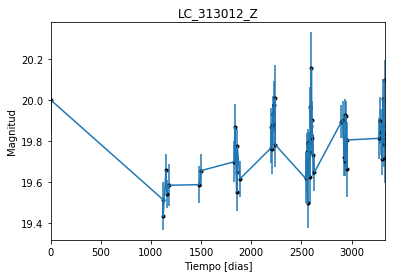

In [2]:
data = np.genfromtxt('LC_313012_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_313012_Z')
plt.savefig("LC_313012_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

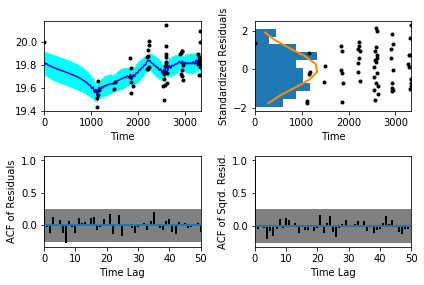

In [5]:
sample.assess_fit()

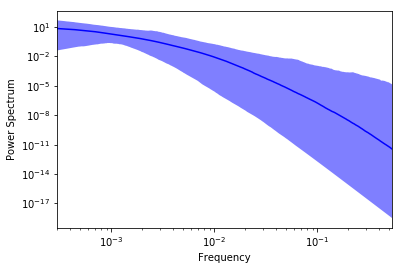

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

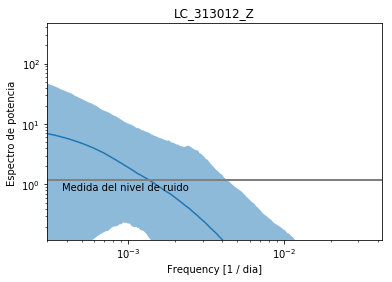

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_313012_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_313012_Z')

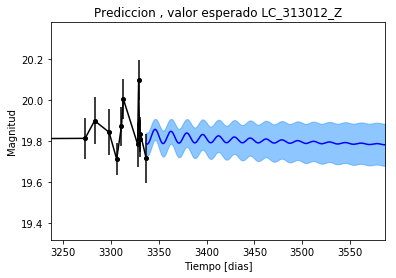

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_313012_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_313012_Z')

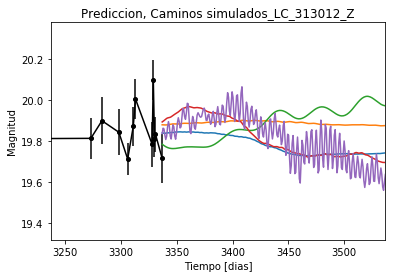

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_313012_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


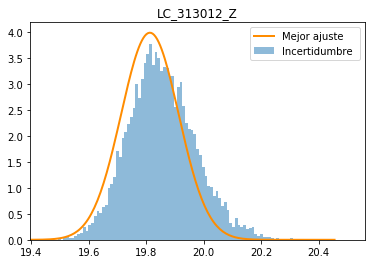

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_313012_Z')
plt.savefig("Mejor_ajuste_LC_313012_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_313012_Z')

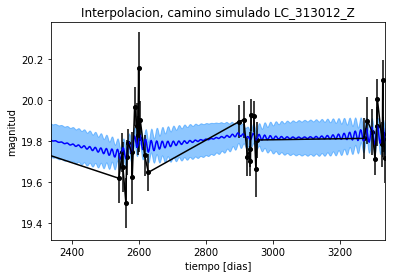

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_313012_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_313012_Z')

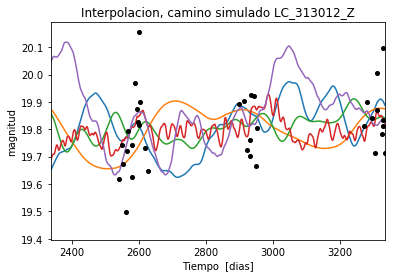

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_313012_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1483.15077103
Median: 0.00760721936879
Standard deviation: 0.185930604318
68% credibility interval: [ 0.00074511  0.15476657]
95% credibility interval: [  3.45572129e-04   7.54613559e-01]
99% credibility interval: [  3.08283321e-04   9.66325584e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 763.730812593
Median: 0.00190530043877
Standard deviation: 0.072535709665
68% credibility interval: [ 0.00045369  0.02210029]
95% credibility interval: [ 0.00031784  0.22826789]
99% credibility interval: [  3.03330774e-04   5.25676574e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 691.635277668
Median: 0.0301534575387
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1238.92134378
Median: 63.9961046763
Standard deviation: 1.5703173142
68% credibility interval: [ 62.20660336  65.10809215]
95% credibility interval: [ 59.78321816  65.65796651]
99% credibility interval: [ 57.78107174  66.17993684]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 866.81124973
Median: 0.760703039244
Standard deviation: 2.14223607305
68% credibility interval: [ 0.0683349   3.98473513]
95% credibility interval: [ 0.01438496  6.90260084]
99% credibility interval: [ 0.00981725  9.76539713]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 558.466090845
Median: 0.346185819444
Standard deviation: 9.24944338555
68% credibility interval: [ 0.01595294  6.3932732 ]
95% credibility interval: [  8.98150194e-04

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 11143.4224173
Median: 1.00605157541e-33
Standard deviation: 1.87154716692e+76
68% credibility interval: [  5.00348773e-75   2.16978992e-03]
95% credibility interval: [  1.32729976e-116   6.01583328e+044]
99% credibility interval: [  2.11007259e-135   1.38350501e+060]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2936.56058225
Median: 19.747829784
Standard deviation: 0.0777466322744
68% credibility interval: [ 19.68913737  19.81442328]
95% credibility interval: [ 19.59889473  19.91100085]
99% credibility interval: [ 19.50413218  20.02618699]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 362.550605588
Median: 0.0100988743633
Standard deviation: 0.244321985187
68% credibility interval: [ 0.          0.30570362]
95% credibility interval: [ 0.          0.91804583]
99% credibility interval: [ 0.          1.03820257]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 362.550605588
Median: 0.0100988743633
Standard deviation: 0.244321985187
68% credibility interval: [ 0.          0.30570362]
95% credibility interval: [ 0.          0.91804583]
99% credibility interval: [ 0.          1.03820257]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2392.73242142
Median: 0.0
Standard deviation: 0.00104188264411
68% cre

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1238.92134378
Median: 63.9961046763
Standard deviation: 1.5703173142
68% credibility interval: [ 62.20660336  65.10809215]
95% credibility interval: [ 59.78321816  65.65796651]
99% credibility interval: [ 57.78107174  66.17993684]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2635.43463616
Median: 0.0181403720987
Standard deviation: 0.0239861818754
68% credibility interval: [ 0.00967337  0.03647024]
95% credibility interval: [ 0.00553272  0.08089061]
99% credibility interval: [ 0.00367186  0.14758871]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1560.15285712
Median: 1.13133355637
Standard deviation: 0.17729578585
68% credibility interval: [ 0.97757677  1.31473273]
95% credibility interval: [ 0.84373288  1.54278977]
99% credibility interval: [ 0.76688593  1.69530556]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 843.931252782
Median: 7.34226297202e-05
Standard deviation: 0.141637037985
68% credibility interval: [  2.58908844e-07   7.22831115e-03]
95% credibility interval: [  6.23404365e-48   2.57520392e-01]
99% credibility interval: [  1.74826876e-63   1.18867764e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1483.15077103
Median: (-0.0477975689665-0.0127678131523j)
Standard deviation: 1.92908546757
68% credibility interval: [-0.97242704-6.66443619j -0.00468166-0.05249026j]
95% credibility interval: [ -4.74137683e+00+0.j          -2.17129372e-03-0.82767013j]
99% credibility interval: [ -6.07160271e+00+0.j          -1.93700123e-03-0.01272284j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 763.730812593
Median: (-0.0119713557226+3.20470175998j)
Standard deviation: 1.60134545207
68% credibility interval: [-0.13886022+0.48361152j -0.00285062+0.00178355j]
95% credibility interval: [-1.43424946+4.73056741j -0.00199707+0.j        ]
99% credibility interval: [ -3.30292333e+00+6.43076533j  -1.90588346e-03+0.j        ]
Posterior su